In [171]:
import pandas as pd
df = pd.read_csv('position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [172]:
m=len(df)
m

10

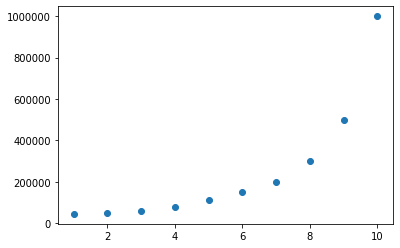

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['Level'], df['Salary'])
plt.show()

In [174]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Position,Level,Salary
0,1,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,1,Senior Consultant,3,60000
3,1,Manager,4,80000
4,1,Country Manager,5,110000


In [175]:
df = df.drop(columns='Position')

In [176]:
y = df['Salary']
y[:5]

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [177]:
X = df.drop(columns = 'Salary')

In [178]:
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [179]:
X['Level1'] = X['Level']**2

In [180]:
X['Level2'] = X['Level']**3

In [181]:
X.head()

,00,Level,Level1,Level2
0,1,1,1,1
1,1,2,4,8
2,1,3,9,27
3,1,4,16,64
4,1,5,25,125


In [182]:
X = X/X.max()

In [183]:
import numpy as np
theta = np.array([0]*len(X.columns))
theta

array([0, 0, 0, 0])

In [ ]:
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

In [184]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m) 

In [185]:
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [186]:
theta = np.array([0.0]*len(X.columns))
J, j, theta = gradientDescent(X, y, theta, 0.05, 700)

In [187]:
theta

array([-38494.26294331,  66878.12378747, 287369.29171661, 460744.26580885])

In [188]:
y_hat = theta*X
y_hat = np.sum(y_hat, axis=1)

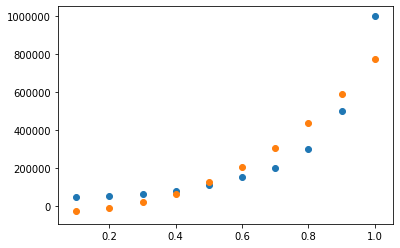

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X['Level'],y= y)          
plt.scatter(x=X['Level'], y=y_hat)
plt.show()